# SPIdepth training
This notebook tries to train the SPIdepth network.

## Creating small split files
Since we are going to make a simple test, is not necessary to use all the Kitti dataset.So, let's create new split files with a small set of train and validation samples.

In [2]:
import os
import random

def sample_and_write_file(input_path, output_path, sample_ratio=0.1, seed=42):
    """
    Reads a list of file paths, selects a subset while maintaining proportions, and writes to a new file.
    
    Args:
        input_path (str): Path to the original split file (train_files.txt or val_files.txt).
        output_path (str): Path to save the reduced split file.
        sample_ratio (float): Fraction of original samples to keep (e.g., 0.1 for 10%).
        seed (int): Random seed for reproducibility.
    """
    # Read the original file lines
    with open(input_path, "r") as f:
        lines = f.readlines()
    
    # Set random seed for reproducibility
    random.seed(seed)

    # Compute number of samples to keep
    num_samples = max(1, int(len(lines) * sample_ratio))  # Ensure at least 1 sample
    
    # Randomly select a subset of lines
    sampled_lines = random.sample(lines, num_samples)

    # Write the sampled lines to the new file
    with open(output_path, "w") as f:
        f.writelines(sampled_lines)
    
    print(f"Created {output_path} with {num_samples} samples.")

In [4]:
# Paths to original files
split_dir = "splits/eigen_zhou"  
train_file = os.path.join(split_dir, "train_files.txt")
val_file = os.path.join(split_dir, "val_files.txt")

# Paths to new small dataset files
train_file_small = os.path.join(split_dir, "train_files_small.txt")
val_file_small = os.path.join(split_dir, "val_files_small.txt")

# Adjust the sample ratio (e.g., 0.1% of the original dataset)
sample_ratio = 0.001

In [6]:
# Generate the small dataset files
sample_and_write_file(train_file, train_file_small, sample_ratio)
sample_and_write_file(val_file, val_file_small, sample_ratio)

Created splits/eigen_zhou\train_files_small.txt with 71 samples.
Created splits/eigen_zhou\val_files_small.txt with 4 samples.


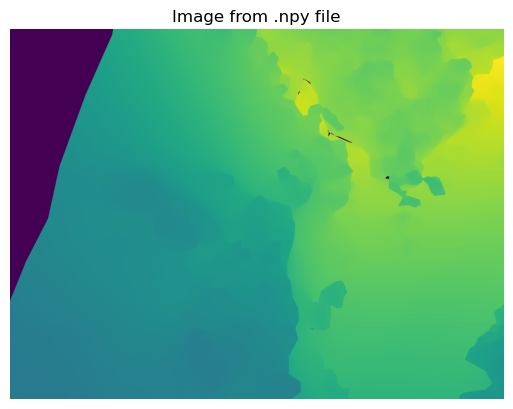

In [9]:
#read depth map wilduav
import numpy as np
import matplotlib.pyplot as plt

path= "D:/PythonProyects/Datasets/WildUAV/mapping_set/seq03_depth/depth/"
# Load the .npy file
image = np.load(path+ '000001.npy')

# Plot the image
plt.imshow(image)  # You can change 'gray' to other colormaps if needed
#plt.colorbar()  #print(image.shape, image.dtype)
print(np.min(image), np.max(image)) Optional: adds a colorbar to the side
plt.title('Image from .npy file')
plt.axis('off')  # Optional: hides the axis
plt.show()

In [11]:
print(image.shape, image.dtype)
print(np.min(image), np.max(image))

(3956, 5280) float32
0.0 67.14691


In [11]:
import os
import csv
from pathlib import Path

def convert_midair_csv_to_txt(root_dir, output_txt_path, max_lines_per_csv=50):
    root_dir = Path(root_dir)
    output_lines = []

    # Recursively find all CSV files under "train"
    csv_files = list(root_dir.rglob("test_data/**/*.csv"))
    print(f"Found {len(csv_files)} CSV files.")

    for csv_file in csv_files:
        with open(csv_file, "r", newline='') as f:
            reader = csv.DictReader(f, delimiter='\t')
            for i, row in enumerate(reader):
                if i >= max_lines_per_csv:
                    break
                camera_l = row["camera_l"]
                disp = row["disp"]

                # Extract frame index from filename
                frame_index = int(Path(camera_l).stem)

                # Convert to POSIX format for cross-platform compatibility
                camera_l_folder = Path(camera_l).parent.as_posix()
                disp_folder = Path(disp).parent.as_posix()

                output_lines.append(f"{camera_l_folder} {disp_folder} {frame_index}")

    # Write all processed lines to one txt file
    with open(output_txt_path, "w") as f:
        f.write("\n".join(output_lines))

    print(f"Saved {len(output_lines)} lines to {output_txt_path}")

# Example usage
convert_midair_csv_to_txt(
    root_dir="C:/Users/JorgeTurriate/ProyectosPython/MDE_Internship/M4Depth/data/midair_reduced",    
    output_txt_path="C:/Users/JorgeTurriate/ProyectosPython/MDE_Internship/SPIdepth-training/splits/midair/midair_test_split.txt",
    max_lines_per_csv=50
)


Found 64 CSV files.
Saved 3200 lines to C:/Users/JorgeTurriate/ProyectosPython/MDE_Internship/SPIdepth-training/splits/midair/midair_test_split.txt


In [9]:
import os
import csv
from pathlib import Path

def convert_midair_csv_to_txt(root_dir, output_txt_path, max_lines_per_csv=50):
    root_dir = Path(root_dir)
    output_lines = []

    # Recursively find all CSV files under "train"
    csv_files = list(root_dir.rglob("test_data/**/*.csv"))
    print(f"Found {len(csv_files)} CSV files.")

    if not csv_files:
        print("No CSV files found!")
        return

    # Print headers of first CSV file
    with open(csv_files[0], "r") as f:
        reader = csv.DictReader(f)
        print("CSV headers detected:", reader.fieldnames)
        return  # Stop here for now, we just want to check headers

# Run just to check headers
convert_midair_csv_to_txt(
    root_dir="C:/Users/JorgeTurriate/ProyectosPython/MDE_Internship/M4Depth/data/midair_reduced",    
    output_txt_path="C:/Users/JorgeTurriate/ProyectosPython/MDE_Internship/SPIdepth-training/splits/midair/midair_test_split.txt",  
)

Found 64 CSV files.
CSV headers detected: ['id\tcamera_l\tdisp\tqw\tqx\tqy\tqz\ttx\tty\ttz']
